 [都道府県データランキング](http://uub.jp/pdr/)

http://nbviewer.jupyter.org/urls/bitbucket.org/Shinaji/public_ipython/raw/6cae2a01652ba73964a847291d5654d80df86d2e/Self%20Organizing%20Map.ipynb

In [268]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [221]:
data = pd.read_csv("kendata.csv", delimiter=",", encoding="utf-8")  # header がない場合は header=None
data.head()

,都道府県,人口,面積,人口密度,外国人,国籍不詳率,公務員,産業動物,小動物診療
0,愛知県,7507691,5173,1451,160228,0,1671,395,92
1,愛媛県,1374881,5676,242,7828,0,397,123,34
2,茨城県,2907262,6097,477,40477,0,1145,216,124
3,岡山県,1915401,7114,269,18476,0,596,157,82
4,沖縄県,1439913,2281,631,7651,0,450,177,58


In [222]:
dataindex = data.columns[1:]
dataindex

Index(['人口', '面積', '人口密度', '外国人', '国籍不詳率', '公務員', '産業動物', '小動物診療'], dtype='object')

In [225]:
X = data[dataindex]
X.head()

,人口,面積,人口密度,外国人,国籍不詳率,公務員,産業動物,小動物診療
0,7507691,5173,1451,160228,0,1671,395,92
1,1374881,5676,242,7828,0,397,123,34
2,2907262,6097,477,40477,0,1145,216,124
3,1915401,7114,269,18476,0,596,157,82
4,1439913,2281,631,7651,0,450,177,58


In [269]:
# 正規化
sc = MinMaxScaler()
data_std = sc.fit_transform(X)
data_std[0:5]

array([[ 0.53097892,  0.0430602 ,  0.22465887,  0.49755272,  0.        ,
         0.39047126,  0.54432348,  0.08263695],
       [ 0.06163037,  0.04963158,  0.02826511,  0.01475019,  0.        ,
         0.06059037,  0.12130638,  0.02878366],
       [ 0.17890464,  0.05513169,  0.06643925,  0.11818208,  0.        ,
         0.2542724 ,  0.2659409 ,  0.11234912],
       [ 0.10299677,  0.06841816,  0.03265107,  0.04848301,  0.        ,
         0.11211807,  0.17418351,  0.0733519 ],
       [ 0.06660731,  0.00527801,  0.09145549,  0.01418945,  0.        ,
         0.07431383,  0.20528771,  0.05106778]])

In [270]:
# 自己組織化マップ SOM を生成する　　　　M :２次元配置されたニューロンの重み配列    x : 入力データ,  alpha：学習係数
def organize_som(M, x, alpha=0.3):
    mini, minj = get_winner(M,x)
    for i in range(-2,3): #  勝者の近傍5x5 の範囲を与えられたデータ（このプログラムでは色）に近づける
        for j in range(-2,3):
            try:
                M[mini+i,minj+j] += alpha * (x - M[mini+i,minj+j])/(abs(i)+abs(j)+1)
            except:
                pass
    return M

def get_winner(M,x):
    col =  M.shape[1]
    # row =  M.shape[0]
    min_i = np.argmin(((M-x)**2).sum(axis=2)) 
    mini = min_i // col # argmin は1次元化した番号が返ってくるので　2次元化
    minj = min_i % col
    return mini, minj

In [271]:
from sklearn.cluster import KMeans
def d(M,n,itr):
    print(M.shape)
    row = M.shape[0]
    col = M.shape[1]
    ch = M.shape[2]
    data = M.reshape(col*row,ch)
    km = KMeans(n_clusters=n,init='random',n_init=1,max_iter=itr,random_state=1)
    labelimage = (km.fit(data).labels_).reshape(row,col)
    centers = km.cluster_centers_
    return labelimage, centers 

from matplotlib.colors import LinearSegmentedColormap
def generate_cmap(centers):
    lebels = len(centers)
    print(lebels,centers)
    values = range(lebels)
    color_list = centers
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

In [272]:
def plotBoundary(labels, mesh=True, boundary=True, n_neighbors=1, cmap='tab20'):

    YY,XX = np.mgrid[row-1:-1:-1, 0:col] # make a grid    
    Z = labels  #  matplotlib  の  plot   は　X 、Yの並びなので numpy 配列を転地しないといけない   

    if mesh:
        #        plt.pcolormesh(XX, YY, Z, cmap='tab20',zorder=-10) # paint in 2 colors, if Z > 0 or not
        plt.pcolormesh(XX, YY, Z, cmap=cmap,zorder=-10) # paint in 2 colors, if Z > 0 or not
        plt.colorbar()

    if boundary:
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=[1])

(20, 20, 8)
5 [[ 0.0962508   0.04632467  0.06067862]
 [ 0.2046731   0.3672577   0.09736828]
 [ 0.12095633  0.08725564  0.0396388 ]
 [ 0.49021244  0.15921695  0.38311678]
 [ 0.03527043  0.04210621  0.0286224 ]]


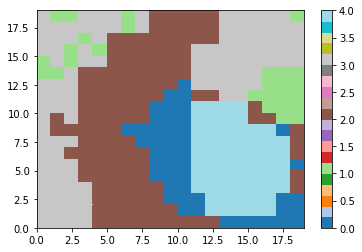

In [302]:
np.random.shuffle(data_std)

row = 20
col = 20
learntime = 1024
alpha = 0.3

W = np.random.random([row,col,8])

for time in range(learntime):
    for data  in data_std:
            organize_som(W, data)

labelimage, centers = d(W,5,1)
custom_cmap = generate_cmap(centers[:,:3])
plotBoundary(labelimage, mesh=True, boundary=False, n_neighbors=2)

(20, 20, 8)
5 [[ 0.13680074  0.08620843  0.05383788]
 [ 0.46128052  0.62662442  0.38167059]
 [ 0.39181525  0.05527803  0.19329477]
 [ 0.69062685  0.02076873  0.69131454]
 [ 0.05509621  0.05623323  0.03111446]]


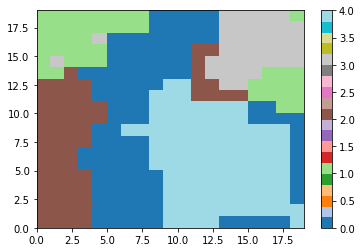

In [304]:
labelimage, centers = d(W,5,200)
custom_cmap = generate_cmap(centers[:,:3])
plotBoundary(labelimage, mesh=True, boundary=False, n_neighbors=2)

(10, 10, 8)
5 [[ 0.19692875  0.2115571   0.07248224]
 [ 0.04633129  0.04576723  0.03017888]
 [ 0.45318119  0.08577836  0.35445311]
 [ 0.06986587  0.06712708  0.02978977]
 [ 0.13110518  0.07875092  0.05952443]]


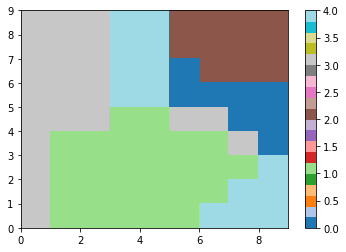

In [286]:
labelimage, centers = d(W,5,3)
custom_cmap = generate_cmap(centers[:,:3])
plotBoundary(labelimage, mesh=True, boundary=False, n_neighbors=2)

(10, 10, 8)
5 [[ 0.23036894  0.23955919  0.09491673]
 [ 0.05017634  0.04968524  0.03032443]
 [ 0.48259309  0.08739885  0.38142281]
 [ 0.07984881  0.08360884  0.02712449]
 [ 0.16759226  0.06746987  0.09006284]]


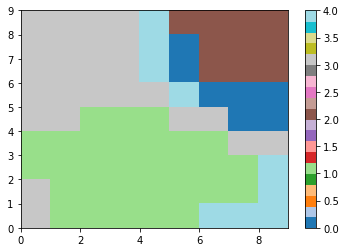

In [287]:
labelimage, centers = d(W,5,4)
custom_cmap = generate_cmap(centers[:,:3])
plotBoundary(labelimage, mesh=True, boundary=False, n_neighbors=2)

(10, 10, 8)
5 [[ 0.26704985  0.24275444  0.12547767]
 [ 0.05516188  0.04916947  0.03348502]
 [ 0.49282114  0.08512498  0.38985366]
 [ 0.09038463  0.09753149  0.02627582]
 [ 0.19568522  0.06771117  0.11455667]]


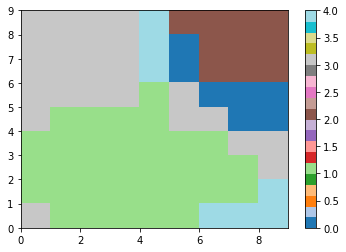

In [288]:
labelimage, centers = d(W,5,5)
custom_cmap = generate_cmap(centers[:,:3])
plotBoundary(labelimage, mesh=True, boundary=False, n_neighbors=2)

(10, 10, 8)
5 [[ 0.26366103  0.27472408  0.10618751]
 [ 0.06123808  0.05180786  0.0355146 ]
 [ 0.52591918  0.09130194  0.42712333]
 [ 0.10861047  0.09972215  0.03564988]
 [ 0.27949576  0.06370097  0.19183755]]


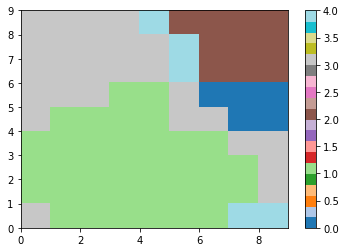

In [294]:
labelimage, centers = d(W,5,1000)
custom_cmap = generate_cmap(centers[:,:3])
plotBoundary(labelimage, mesh=True, boundary=False, n_neighbors=2)

(10, 10, 8)
5 [[ 0.26366103  0.27472408  0.10618751]
 [ 0.06123808  0.05180786  0.0355146 ]
 [ 0.52591918  0.09130194  0.42712333]
 [ 0.10861047  0.09972215  0.03564988]
 [ 0.27949576  0.06370097  0.19183755]]


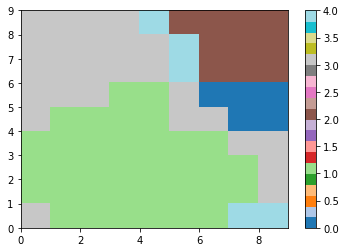

In [301]:
labelimage, centers = d(W,5,100)
custom_cmap = generate_cmap(centers[:,:3])
plotBoundary(labelimage, mesh=True, boundary=False, n_neighbors=2)